In [1]:
import pandas as pd

In [2]:
SUBJECTS = [
	"abstract_algebra",
	"anatomy",
	"astronomy",
	"business_ethics",
	"clinical_knowledge",
	"college_biology",
	"college_chemistry",
	"college_computer_science",
	"college_mathematics",
	"college_medicine",
	"college_physics",
	"computer_security",
	"conceptual_physics",
	"econometrics",
	"electrical_engineering",
	"elementary_mathematics",
	"formal_logic",
	"global_facts",
	"high_school_biology",
	"high_school_chemistry",
	"high_school_computer_science",
	"high_school_european_history",
	"high_school_geography",
	"high_school_government_and_politics",
	"high_school_macroeconomics",
	"high_school_mathematics",
	"high_school_microeconomics",
	"high_school_physics",
	"high_school_psychology",
	"high_school_statistics",
	"high_school_us_history",
	"high_school_world_history",
	"human_aging",
	"human_sexuality",
	"international_law",
	"jurisprudence",
	"logical_fallacies",
	"machine_learning",
	"management",
	"marketing",
	"medical_genetics",
	"miscellaneous",
	"moral_disputes",
	"moral_scenarios",
	"nutrition",
	"philosophy",
	"prehistory",
	"professional_accounting",
	"professional_law",
	"professional_medicine",
	"professional_psychology",
	"public_relations",
	"security_studies",
	"sociology",
	"us_foreign_policy",
	"virology",
	"world_religions",
]

In [3]:
subcategories = {
    "abstract_algebra": ["math"],
    "anatomy": ["health"],
    "astronomy": ["physics"],
    "business_ethics": ["business"],
    "clinical_knowledge": ["health"],
    "college_biology": ["biology"],
    "college_chemistry": ["chemistry"],
    "college_computer_science": ["computer science"],
    "college_mathematics": ["math"],
    "college_medicine": ["health"],
    "college_physics": ["physics"],
    "computer_security": ["computer science"],
    "conceptual_physics": ["physics"],
    "econometrics": ["economics"],
    "electrical_engineering": ["engineering"],
    "elementary_mathematics": ["math"],
    "formal_logic": ["philosophy"],
    "global_facts": ["other"],
    "high_school_biology": ["biology"],
    "high_school_chemistry": ["chemistry"],
    "high_school_computer_science": ["computer science"],
    "high_school_european_history": ["history"],
    "high_school_geography": ["geography"],
    "high_school_government_and_politics": ["politics"],
    "high_school_macroeconomics": ["economics"],
    "high_school_mathematics": ["math"],
    "high_school_microeconomics": ["economics"],
    "high_school_physics": ["physics"],
    "high_school_psychology": ["psychology"],
    "high_school_statistics": ["math"],
    "high_school_us_history": ["history"],
    "high_school_world_history": ["history"],
    "human_aging": ["health"],
    "human_sexuality": ["culture"],
    "international_law": ["law"],
    "jurisprudence": ["law"],
    "logical_fallacies": ["philosophy"],
    "machine_learning": ["computer science"],
    "management": ["business"],
    "marketing": ["business"],
    "medical_genetics": ["health"],
    "miscellaneous": ["other"],
    "moral_disputes": ["philosophy"],
    "moral_scenarios": ["philosophy"],
    "nutrition": ["health"],
    "philosophy": ["philosophy"],
    "prehistory": ["history"],
    "professional_accounting": ["other"],
    "professional_law": ["law"],
    "professional_medicine": ["health"],
    "professional_psychology": ["psychology"],
    "public_relations": ["politics"],
    "security_studies": ["politics"],
    "sociology": ["culture"],
    "us_foreign_policy": ["politics"],
    "virology": ["health"],
    "world_religions": ["philosophy"],
}

categories = {
    "STEM": ["physics", "chemistry", "biology", "computer science", "math", "engineering"],
    "humanities": ["history", "philosophy", "law"],
    "social sciences": ["politics", "culture", "economics", "geography", "psychology"],
    "other (business, health, misc.)": ["other", "business", "health"],
}

In [9]:
# df = pd.read_excel('../small_set_new/'+s+'_small.xlsx', index_col=0)
human_metrics = pd.read_csv('human_metrics.csv')

In [13]:
automated_scores = pd.read_csv('automated_scores.csv')

In [10]:
human_metrics.head()

,subject,subcategory,category,valid_r,com_r,num_r,lex_r,ans_r
0,abstract_algebra,math,STEM,0.7,0.0,1.6,0.3,0.7
1,anatomy,health,"other (business, health, misc.)",1.0,0.0,1.0,0.0,1.0
2,astronomy,physics,STEM,0.8,0.0,1.0,0.0,0.8
3,business_ethics,business,"other (business, health, misc.)",0.5,0.3,1.4,0.2,0.5
4,clinical_knowledge,health,"other (business, health, misc.)",0.9,0.0,1.0,0.1,0.7


In [11]:
automated_scores.head()

,subject,subcategory,category,ppl,contradiction,sts
0,abstract_algebra,math,STEM,8.556278,0.8,0.815813
1,anatomy,health,"other (business, health, misc.)",-17.031006,1.0,0.839827
2,astronomy,physics,STEM,-1.067879,1.0,0.853452
3,business_ethics,business,"other (business, health, misc.)",175.240013,0.8,0.639181
4,clinical_knowledge,health,"other (business, health, misc.)",-24.837131,0.8,0.864021


In [253]:
# human = ['valid_r', 'com_r','num_r','lex_r', 'ans_r']
human = ['valid_r','num_r','lex_r', 'ans_r']

automated = ['contradiction','sts']

In [24]:
human_metrics['ppl'] = automated_scores['ppl']
human_metrics['contradiction'] = automated_scores['contradiction']
human_metrics['sts'] = automated_scores['sts']


In [25]:
df_all = human_metrics

In [43]:
df_group = df_all.groupby('category')[automated+human].mean()

In [62]:
df_group.loc['average'] = df_group.mean()

In [63]:
df_group

,ppl,contradiction,sts,valid_r,com_r,num_r,lex_r,ans_r
category,,,,,,,,
STEM,2.335825,0.833333,0.838522,0.750000,0.011111,1.072222,0.161111,0.672222
humanities,2.549575,0.907692,0.681038,0.638462,0.015385,0.961538,0.130769,0.607692
"other (business, health, misc.)",-365.100677,0.921429,0.755318,0.790476,0.021429,1.042857,0.147619,0.747619
social sciences,6.283579,0.958333,0.827125,0.941667,0.000000,1.091667,0.108333,0.916667
average,-88.482924,0.905197,0.775501,0.780151,0.011981,1.042071,0.136958,0.736050


In [75]:
list(categories.keys())

['STEM', 'humanities', 'social sciences', 'other (business, health, misc.)']

In [86]:
entries = []
for metric in automated + human:
    if metric == 'ppl':
        continue
    for i, cat in enumerate(list(categories.keys()) + ['average']):
        item = {}
        item['category'] = cat
        item['metric'] = metric
        item['value'] = df_group[metric][i]
        entries.append(item)


In [87]:
df_entries = pd.DataFrame.from_dict(entries)

In [88]:
len(df_entries)

35

In [89]:
df_entries

,category,metric,value
0,STEM,contradiction,0.833333
1,humanities,contradiction,0.907692
2,social sciences,contradiction,0.921429
3,"other (business, health, misc.)",contradiction,0.958333
4,average,contradiction,0.905197
5,STEM,sts,0.838522
6,humanities,sts,0.681038
7,social sciences,sts,0.755318
8,"other (business, health, misc.)",sts,0.827125
9,average,sts,0.775501


In [120]:
hue_labels = list(categories.keys()) + ['average']

TypeError: 'NoneType' object is not iterable

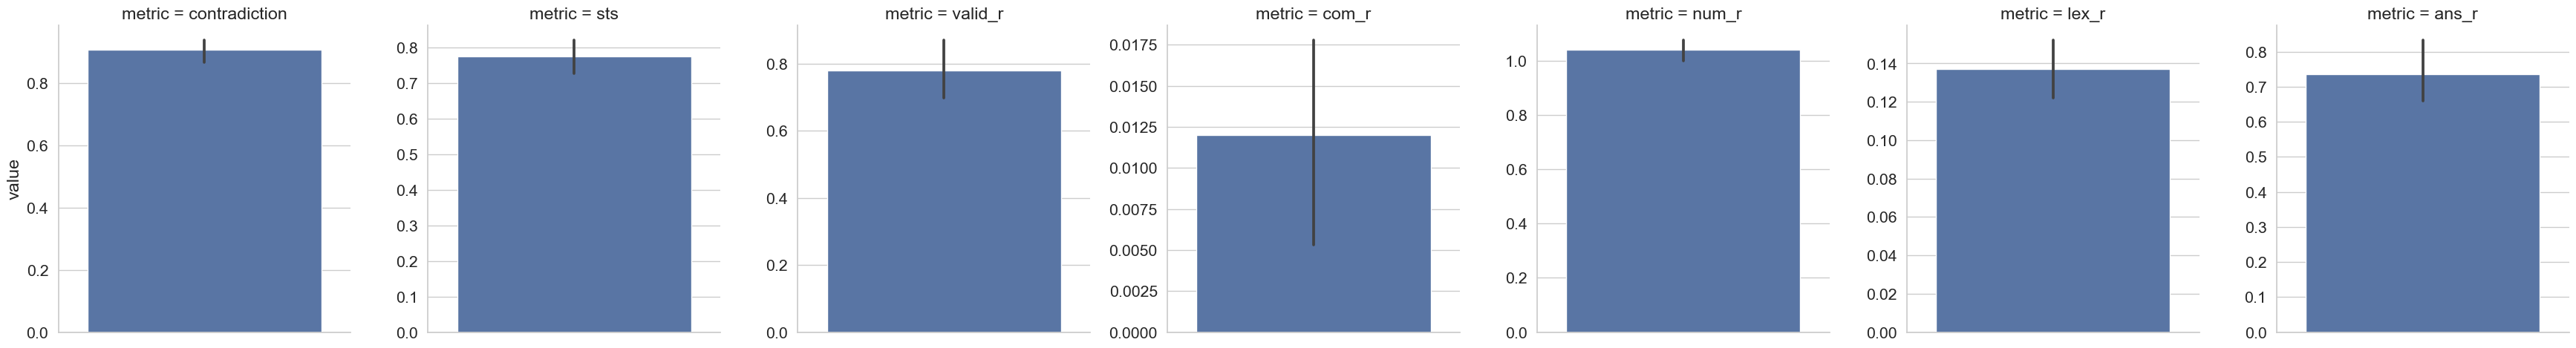

In [172]:
# g = sns.FacetGrid(df_entries, col = 'value', row = 'metric', hue = 'category')

# g = sns.FacetGrid(
#     data = df_entries, col = "metric", hue = 'category', col_wrap = 4, sharey = False, despine = True
#     )
# g.map_dataframe(sns.barplot, x = "category", y = "value",)

g = sns.catplot(
    data = df_entries, x = "category", y = "value", col = "metric", hue = 'category',
    kind = 'bar', sharey = False, col_wrap = 4, height = 3
)

# g = sns.catplot(data = df_entries, col = "metric", y = 'value', hue = 'category', kind = 'bar',
#                 height = 5, sharey = False
                
#                 )

# g.set_axis_labels("Category")

# g.set_xlabels("")
# g.set_xticklabels("")
# g.set_ylabels("")
# g.add_legend(legend_data={
#     key: value for key, value in zip(hue_labels, g._legend_data.values())
# })
# sns.move_legend(g, "upper left", bbox_to_anchor=(.65, .45))


In [18]:
from scipy.stats import pearsonr, spearmanr, kendalltau
import numpy as np

In [19]:
df_metrics = automated_scores[automated]

rho = df_metrics.corr()
pearsoncorr = df_metrics.corr(method=lambda x, y: pearsonr(x, y)[0]) - np.eye(*rho.shape)
pval = df_metrics.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
pdisp = pval.applymap(lambda x: f' ({x:.3f})')
rho = rho.round(3).astype(str) + p
print(rho)

                  ppl contradiction     sts
ppl            1.0***         0.005   0.061
contradiction   0.005        1.0***   0.115
sts             0.061         0.115  1.0***


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df_all.head()

,subject,subcategory,category,valid_r,com_r,num_r,lex_r,ans_r,ppl,contradiction,sts
0,abstract_algebra,math,STEM,0.7,0.0,1.6,0.3,0.7,8.556278,0.8,0.815813
1,anatomy,health,"other (business, health, misc.)",1.0,0.0,1.0,0.0,1.0,-17.031006,1.0,0.839827
2,astronomy,physics,STEM,0.8,0.0,1.0,0.0,0.8,-1.067879,1.0,0.853452
3,business_ethics,business,"other (business, health, misc.)",0.5,0.3,1.4,0.2,0.5,175.240013,0.8,0.639181
4,clinical_knowledge,health,"other (business, health, misc.)",0.9,0.0,1.0,0.1,0.7,-24.837131,0.8,0.864021


In [246]:
human_label = ['Val.', 'Num.', 'Lex.', 'Ans.']
automated_label = ['STS', 'Contra.']

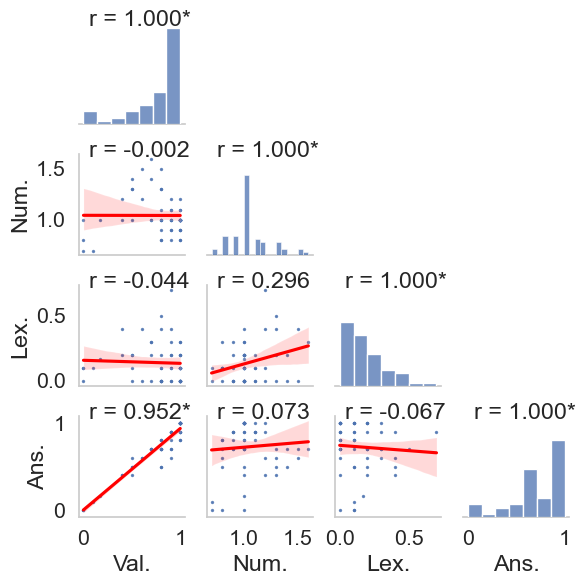

In [250]:
def corrfunc(x, y, hue=None, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    try:
        r, p = pearsonr(x, y)
    except:
        r = -1
        p = 0.0
    if p <= 0.01:
        add_asterisk = '*'
    else:
        add_asterisk = ''
    ax = ax or plt.gca()
    ax.annotate(f'r = {r:.3f}{add_asterisk}', xy=(0.1, 0.97), xycoords=ax.transAxes)

sns.set(font_scale=1.4)
sns.set_style("whitegrid", {'axes.grid': False})

g = sns.pairplot(
    df_all, 
    # diag_kind="kde",
    x_vars = human,
    y_vars = human ,
    kind="reg", 
    plot_kws={
        'line_kws':{'color':'red'},
        'scatter_kws': {'s': 2}
    },
    corner = True,
    height = 1.5,
    # hue = 'category'
    
)
g.map(corrfunc)
for i in range(len(human_label)):
    for j in range(len(human_label)):
        # if i == 0 and j == 0:
        #     continue
        if i >= j:
            continue
        # print(i,j)
        g.axes[j,i].xaxis.set_label_text(human_label[i])
        g.axes[j,i].yaxis.set_label_text(human_label[j])

g.axes[3,3].xaxis.set_label_text(human_label[3])
g.tight_layout()
# g.axes[0,0].set_xlim((0.0,0.8))
# g.axes[0,1].set_xlim((-0.1,1.0))
# g.axes[0,2].set_xlim((-0.1,1.0))
# g.axes[0,3].set_xlim((-0.1,1.0))
# g.axes[0,4].set_xlim((-0.1,1.0))

plt.show()


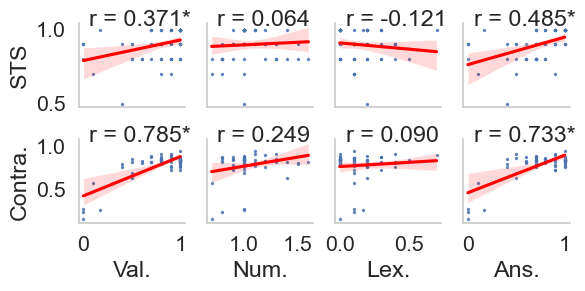

In [254]:
def corrfunc(x, y, hue=None, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    try:
        r, p = pearsonr(x, y)
    except:
        r = -1
        p = 0.0
    if p <= 0.01:
        add_asterisk = '*'
    else:
        add_asterisk = ''
    ax = ax or plt.gca()
    ax.annotate(f'r = {r:.3f}{add_asterisk}', xy=(0.1, 0.97), xycoords=ax.transAxes)

sns.set(font_scale=1.4)
sns.set_style("whitegrid", {'axes.grid': False})

g = sns.pairplot(
    df_all, 
    # diag_kind="kde",
    x_vars = human,
    y_vars = automated,
    kind="reg", 
    plot_kws={
        'line_kws':{'color':'red'},
        'scatter_kws': {'s': 2}
    },
    # corner = True,
    height = 1.5
    # hue = 'category'
    
)
g.map(corrfunc)

for i in range(len(human_label)):
    for j in range(len(automated_label)):
        g.axes[j,i].xaxis.set_label_text(human_label[i])
        g.axes[j,i].yaxis.set_label_text(automated_label[j])

g.tight_layout()
# g.axes[0,0].set_xlim((0.0,0.8))
# g.axes[0,1].set_xlim((-0.1,1.0))
# g.axes[0,2].set_xlim((-0.1,1.0))
# g.axes[0,3].set_xlim((-0.1,1.0))
# g.axes[0,4].set_xlim((-0.1,1.0))

plt.show()


In [ ]:
# Spearman correlations between different metrics
sys_list = list(EXP_W_ANNOTS)
spearman_coeffs = dict()
for met1, met2 in itertools.product(all_rankings, all_rankings):
    met1_ranks = [all_rankings[met1][sys] for sys in sys_list]
    met2_ranks = [all_rankings[met2][sys] for sys in sys_list]
    res = spearmanr(met1_ranks, met2_ranks)
    spearman_coeffs[(met1, met2)] = res

ser = pd.Series([res.correlation for res in list(spearman_coeffs.values())],
    index=pd.MultiIndex.from_tuples(spearman_coeffs.keys()))
df_corr = ser.unstack().fillna(0)

h = plt.figure(figsize=(12, 9))
sns.set(font_scale=1.6)
sns.set_style("whitegrid")

mask = np.array(df_corr)
for i in range(len(all_rankings)):
    for j in range(i, len(all_rankings)):
        mask[j][i] = 0.0
colormap = sns.color_palette("Blues")
sns.heatmap(df_corr, annot=True, annot_kws={"size":16}, mask=mask, cmap=colormap)
